In [176]:
# pip install easyocr

In [177]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr

In [178]:
img = cv2.imread("/content/Screenshot 2024-03-01 003611.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200)
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]

In [179]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

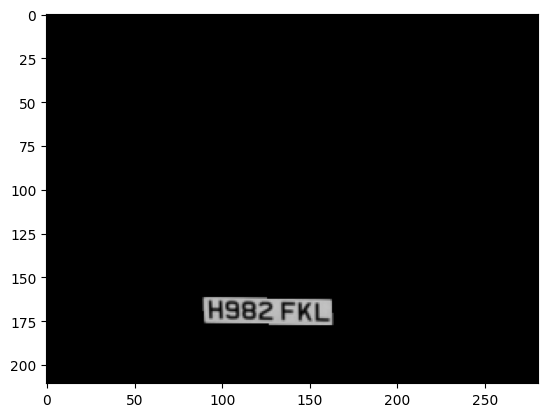

In [180]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [181]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+22, y1:y2+22]

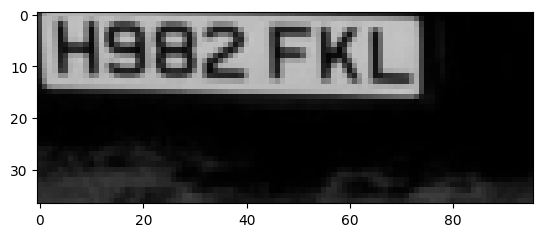

In [182]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [183]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [75, 0], [75, 19], [0, 19]], 'H982 FKL', 0.4558436211569499)]

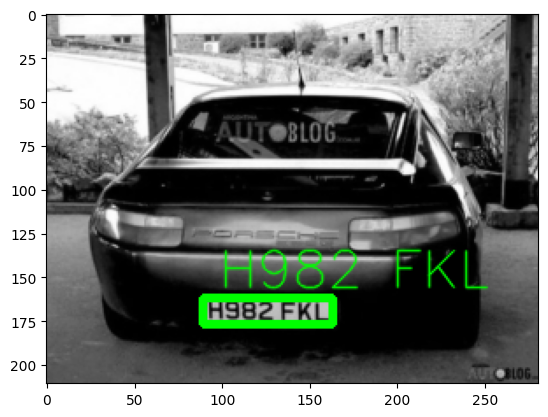

In [184]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0]+9, approx[1][0][1]-20), fontFace=font, fontScale=1, color=(0,255,0), thickness=1, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))